In [1]:
from sympy import *
init_printing()

In [2]:
x1, x2, a, b, w, p1, p2, L = symbols('x_1 x_2 alpha beta w p_1 p_2 lambda')

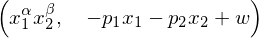

In [6]:
U = (x1**a) * (x2**b)
budget_constraint = w - p1*x1 - p2*x2

U, budget_constraint

## Constrained Maximization Problem

The consumer chooses $\mathbf{x} = (x_1, x_2)$ to solve,

\begin{align}
    \max_{\mathbf{x}} &\; U(\mathbf{x}) = x_1^{\alpha} x_2^{\beta} \\
    s.t. &\; \mathbf{p}\cdot \mathbf{x} = w
\end{align}

where $\mathbf{p} = (p_1, p_2) \gg \mathbf{0}$

## Convert to Unconstrained Problem

We can convert the constrained optimization problem by forming the *Lagrangian* function as our objective function.

\begin{align}
    \mathcal{L}(\mathbf{x},\lambda) &= U(\mathbf{x}) + \lambda \left(w - \mathbf{p}\cdot \mathbf{x} \right) \\
    &= x_1^{\alpha} x_2^{\beta} + \lambda (w - p_1 x_1 - p_2 x_2)
\end{align}

Using this as the objective function we can derive the first order condition for a maximum (yielding the *critical points*) and test the second order condition at those critical points to verify we have a local maximum and not a minimum or saddle point.

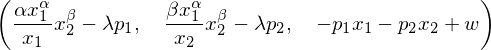

In [9]:
Lagrange =  U + L*budget_constraint

Lagrange_x1 = Lagrange.diff(x1)
Lagrange_x2 = Lagrange.diff(x2)
Lagrange_L = Lagrange.diff(L)

Lagrange_x1, Lagrange_x2, Lagrange_L

We solve the first two conditions (partial w.r.t. $x_1,x_2$) for the multiplier $\lambda$ and then set them equal to each other to get rid of the $\lambda$ term and solve for $x_1$ in terms of $x_2$ and parameters.

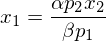

In [15]:
term1 = solve(Lagrange_x1, L)[0].simplify()
term2 = solve(Lagrange_x2, L)[0]

x1_temp = solve(term1 - term2, x1)[0].simplify()
Eq(x1, x1_temp)

Now we can substitute our expression for $x_1$, that summarizes the first 2 conditions, into the third first order condition (associated with $\lambda$), solve for $x_2$ to get the **Marshalian Demand** function for $x_2$. 

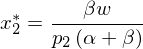

In [17]:
subbed_term = Lagrange_L.subs(x1, x1_temp)
x2_star = solve(subbed_term, x2)[0]
Eq(Symbol('x_2^*'), x2_star)

We can now substitute the demand function $x_2^*(\mathbf{p},w)$ into another first order condition, solve for $x_1$ to get its demand function.

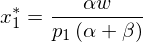

In [18]:
subbed_term = Lagrange_L.subs(x2, x2_star)
x1_star = solve(subbed_term, x1)[0]
Eq(Symbol('x_1^*'), x1_star)

Now that we know $x_1^*$ and $x_2^*$ we can substitute them into one the first order conditions that were solved for $\lambda$ and derive the optimal Lagrange multiplier value (which represents the marginal utility of wealth at the optimal choice).

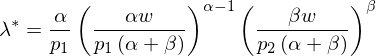

In [34]:
L_star = term1.subs([(x1, x1_star), (x2, x2_star)]).simplify()
Eq(Symbol('lambda^*'), L_star)

The Walrasian demand is the "argmax" of the utility maximization problem.

\begin{align}
    \mathbf{x}(\mathbf{p},w) &= (x_1^*(\mathbf{p},w), x_2^*(\mathbf{p},w))
\end{align}

substituting the solutions to the maximization problem into the utility function we can derive the **indirect utility**.

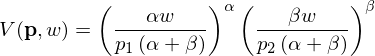

In [35]:
V = U.subs([(x1, x1_star), (x2, x2_star)]).simplify()
Eq(Symbol('V(\mathbf{p},w)'), V)